# Final Project Report

* Class: DS 5100
* Student Name: Chloe Merriweather
* Student Net ID: cm9qj
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL: https://github.com/cmerriwe/DS5100_Project_CM9QJ

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

In [18]:
# A code block with your classes.
import pandas as pd
import numpy as np
import random
'''
class Die:
    """
    A die has N faces, each with an associated weight, and can be rolled.
    """

    def __init__(self, faces):
        """
        Initialize a die with faces and default weights.
        """
        if not isinstance(faces, (list, np.ndarray)):
            raise TypeError("Faces must be a list or array")
        if len(set(faces)) != len(faces):
            raise ValueError("Faces must be unique.")

        self._df = pd.DataFrame({'face': faces, 'weight': [1.0] * len(faces)})

    def change_weight(self, face, weight):
        """
        Change the weight for a single face.
        """
        if face not in self._df['face'].values:
            raise ValueError("Face not found.")
        if not isinstance(weight, (int, float)) or weight <= 0:
            raise ValueError("Weight must be positive.")

        self._df.loc[self._df['face'] == face, 'weight'] = float(weight)

    def roll(self, num_rolls=1):
        """
        Roll the die one or more times.
        """
        return list(self._df.sample(n=num_rolls, replace=True, weights='weight')['face'])

    def show(self):
        return self._df.copy()
                                               
        
class Game:
    """
    A game consists of rolling one or more dice of the same kind.
    """
    def __init__(self, dice):
        """
        Initialize with a list of Die objects.
        """
        if not all(isinstance(die, Die) for die in dice):
            raise TypeError("All dice must be Die instances.")
        self.dice = dice
        self._results = None

    def play(self, num_rolls):
        """
        Roll all dice a specific amount of times.
        """
        rolls = {f'die_{i}': die.roll(num_rolls) for i, die in enumerate(self.dice)}
        self._results = pd.DataFrame(rolls)
        self._results.index.name = 'roll_number'

    def show(self, form='wide'):
        """
        Display results in 'wide' or 'narrow' format.
        """
        if self._results is None:
            raise ValueError("No game played yet.")
        if form == 'wide':
            return self._results.copy()
        elif form == 'narrow':
            return self._results.stack().reset_index(name='face')
        else:
            raise ValueError("Form must be 'wide' or 'narrow'.")

    def show_die(self, die_index=0):
        """
        Show the faces and weights of a particular die.
        """
        if not (0 <= die_index < len(self.dice)):
            raise IndexError("Die index out of range.")
        return self.dice[die_index].show()

class Analyzer:
    """
    Analyzes a game's results.
    """

    def __init__(self, game):
        """
        Initialize with a played Game object.
        """
        if not isinstance(game, Game) or game._results is None:
            raise ValueError("Must provide a played Game.")
        self.game = game
        self.results = game.show('wide')

    def jackpot(self):
        """
        Return the number of rolls with all faces.
        """
        is_jackpot = self.results.nunique(axis=1) == 1
        self._jackpot_df = self.results[is_jackpot]
        return int(is_jackpot.sum())

    def combo(self):
        """
        Return a dataframe of unique roll combinations and counts.
        """
        combos = self.results.apply(lambda row: tuple(sorted(row)), axis=1)
        self._combo_df = combos.value_counts().to_frame('count')
        return self._combo_df

    def face_counts_per_roll(self):
        """
        Return a dataframe showing with face counts per roll.
        """
        self._face_counts_df = self.results.apply(lambda row: row.value_counts(), axis=1).fillna(0).astype(int)
        return self._face_counts_df
    def relative_frequency(self):
        """
        Compute the relative frequency of jackpots as the number.
        """
        jackpots = self.jackpot()
        total_rolls = len(self.results)
        return jackpots / total_rolls if total_rolls > 0 else 0
'''

'\nclass Die:\n    """\n    A die has N faces, each with an associated weight, and can be rolled.\n    """\n\n    def __init__(self, faces):\n        """\n        Initialize a die with faces and default weights.\n        """\n        if not isinstance(faces, (list, np.ndarray)):\n            raise TypeError("Faces must be a list or array")\n        if len(set(faces)) != len(faces):\n            raise ValueError("Faces must be unique.")\n\n        self._df = pd.DataFrame({\'face\': faces, \'weight\': [1.0] * len(faces)})\n\n    def change_weight(self, face, weight):\n        """\n        Change the weight for a single face.\n        """\n        if face not in self._df[\'face\'].values:\n            raise ValueError("Face not found.")\n        if not isinstance(weight, (int, float)) or weight <= 0:\n            raise ValueError("Weight must be positive.")\n\n        self._df.loc[self._df[\'face\'] == face, \'weight\'] = float(weight)\n\n    def roll(self, num_rolls=1):\n        """\n   

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

In [15]:
# A code block with your test code.
''' import unittest
import unittest
import pandas as pd
from montecarlo import Die, Game, Analyzer

class TestDie(unittest.TestCase):

    def setUp(self):
        self.die = Die([1, 2, 3])

    def test_init(self):
        self.assertEqual(len(self.die.show()), 3)

    def test_change_weight(self):
        self.die.change_weight(2, 3)
        updated_weight = self.die.show().loc[self.die.show()['face'] == 2, 'weight'].values[0]
        self.assertEqual(updated_weight, 3.5)

    def test_roll(self):
        rolls = self.die.roll(5)
        self.assertEqual(len(rolls), 5)
        self.assertTrue(all(r in [1, 2, 3] for r in rolls))

    def test_show_structure(self):
        df = self.die.show()
        self.assertIn('face', df.columns)
        self.assertIn('weight', df.columns)

class TestGame(unittest.TestCase):

    def setUp(self):
        die1 = Die([1, 2])
        die2 = Die(['A', 'B'])
        self.game = Game([die1, die2])

    def test_play(self):
        self.game.play(10)
        results = self.game.show('wide')
        self.assertEqual(results.shape, (10, 2))

    def test_show_wide_format(self):
        self.game.play(5)
        wide = self.game.show('wide')
        self.assertEqual(wide.shape[0], 5)

    def test_show_narrow_format(self):
        self.game.play(5)
        narrow = self.game.show('narrow')
        self.assertIn('face', narrow.columns)

    def test_show_die(self):
        die_info = self.game.show_die(0)
        self.assertIsInstance(die_info, pd.DataFrame)
        
    def test_game_invalid_dice(self):
        with self.assertRaises(TypeError):
            Game(['not_a_die'])


class TestAnalyzer(unittest.TestCase):

    def setUp(self):
        die = Die(['H', 'T'])
        self.game = Game([die, die, die])
        self.game.play(20)
        self.analyzer = Analyzer(self.game)

    def test_jackpot(self):
        jackpot_count = self.analyzer.jackpot()
        self.assertIsInstance(jackpot_count, int)

    def test_combo(self):
        combo_df = self.analyzer.combo()
        self.assertIn('count', combo_df.columns)

    def test_face_counts_per_roll(self):
        face_counts = self.analyzer.face_counts_per_roll()
        self.assertEqual(face_counts.shape[0], 20)
    
    def test_analyzer_invalid_game(self):
        bad_game = Game([])
        with self.assertRaises(ValueError):
            Analyzer(bad_game)


if __name__ == '__main__':
    unittest.main()
    '''

" import unittest\nimport unittest\nimport pandas as pd\nfrom montecarlo import Die, Game, Analyzer\n\nclass TestDie(unittest.TestCase):\n\n    def setUp(self):\n        self.die = Die([1, 2, 3])\n\n    def test_init(self):\n        self.assertEqual(len(self.die.show()), 3)\n\n    def test_change_weight(self):\n        self.die.change_weight(2, 3)\n        updated_weight = self.die.show().loc[self.die.show()['face'] == 2, 'weight'].values[0]\n        self.assertEqual(updated_weight, 3.5)\n\n    def test_roll(self):\n        rolls = self.die.roll(5)\n        self.assertEqual(len(rolls), 5)\n        self.assertTrue(all(r in [1, 2, 3] for r in rolls))\n\n    def test_show_structure(self):\n        df = self.die.show()\n        self.assertIn('face', df.columns)\n        self.assertIn('weight', df.columns)\n\nclass TestGame(unittest.TestCase):\n\n    def setUp(self):\n        die1 = Die([1, 2])\n        die2 = Die(['A', 'B'])\n        self.game = Game([die1, die2])\n\n    def test_play(self

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [16]:
# e.g. import montecarlo.montecarlo 
import montecarlo.montecarlo

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [19]:
# help(montecarlo)
from montecarlo import Die, Game, Analyzer
help(montecarlo)
help(Die)
help(Game)
help(Analyzer)

Help on package montecarlo:

NAME
    montecarlo

PACKAGE CONTENTS
    montecarlo
    test_montecarlo

FILE
    /sfs/gpfs/tardis/home/cm9qj/Documents/MSDS/DS5100/DS5100_Project_CM9QJ/Project/montecarlo/__init__.py


Help on class Die in module montecarlo.montecarlo:

class Die(builtins.object)
 |  A die has N faces, each with an associated weight, and can be rolled.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, faces)
 |      Initialize a die with faces and equal default weights.
 |  
 |  change_weight(self, face, weight)
 |      Change the weight for a single face.
 |  
 |  roll(self, num_rolls=1)
 |      Roll the die one or more times.
 |  
 |  show(self)
 |      Return the current faces and weights of the die.
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors defined here:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)


## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL: https://github.com/cmerriwe/DS5100_Project_CM9QJ/blob/main/README.md

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [20]:
from montecarlo import Die

fair_coin = Die(['H', 'T'])

unfair_coin = Die(['H', 'T'])
unfair_coin.change_weight('H', 5)

print("Fair Coin:")
print(fair_coin.show())

print("\nUnfair Coin:")
print(unfair_coin.show())

Fair Coin:
  face  weight
0    H     1.0
1    T     1.0

Unfair Coin:
  face  weight
0    H     5.0
1    T     1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [22]:
from montecarlo import Game

fair_game = Game([fair_coin, fair_coin])

fair_game.play(1000)

print("Results of 1000 flips with two fair coins:")
print(fair_game.show('narrow').head())


Results of 1000 flips with two fair coins:
   roll_number level_1 face
0            0   die_0    T
1            0   die_1    H
2            1   die_0    H
3            1   die_1    H
4            2   die_0    H


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [23]:
from montecarlo import Game

new_game = Game([unfair_coin, unfair_coin, fair_coin])

new_game.play(1000)

print("New game played with 1000 flips:")
print(new_game.show('wide').head())

New game played with 1000 flips:
            die_0 die_1 die_2
roll_number                  
0               H     H     T
1               H     H     H
2               H     T     T
3               T     H     T
4               H     H     H


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [24]:
from montecarlo import Analyzer

analyze_fair = Analyzer(fair_game)
analyze_unfair = Analyzer(new_game)

# Get raw jackpot counts
jackpot_fair = analyze_fair.jackpot()
jackpot_unfair = analyze_unfair.jackpot()

# Show results
print(f"Number of jackpots in fair coin game: {jackpot_fair}")
print(f"Number of jackpots in unfair coin game: {jackpot_unfair}")

Number of jackpots in fair coin game: 503
Number of jackpots in unfair coin game: 375


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [26]:
total_rolls_fair = analyze_fair.game._results.shape[0]
total_rolls_unfair = analyze_unfair.game._results.shape[0]

relative_freq_fair = jackpot_fair / total_rolls_fair
relative_freq_unfair = jackpot_unfair / total_rolls_unfair

print(f"Relative frequency of jackpots in fair coin game: {relative_freq_fair:.4f}")
print(f"Relative frequency of jackpots in unfair coin game: {relative_freq_unfair:.4f}")

Relative frequency of jackpots in fair coin game: 0.5030
Relative frequency of jackpots in unfair coin game: 0.3750


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

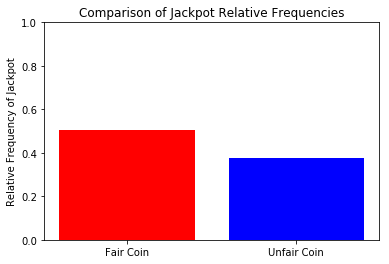

In [28]:
import matplotlib.pyplot as plt

# Prepare data
labels = ['Fair Coin', 'Unfair Coin']
relative_frequencies = [relative_freq_fair, relative_freq_unfair]

plt.bar(labels, relative_frequencies, color=['red', 'blue'])
plt.ylabel('Relative Frequency of Jackpot')
plt.title('Comparison of Jackpot Relative Frequencies')
plt.ylim(0, 1)  # Since relative frequencies are between 0 and 1
plt.show()

## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [30]:
die1 = Die([1, 2, 3, 4, 5, 6])
die2 = Die([1, 2, 3, 4, 5, 6])
die3 = Die([1, 2, 3, 4, 5, 6])

print("Die 1:")
print(die1.show())

print("\nDie 2:")
print(die2.show())

print("\nDie 3:")
print(die3.show())

Die 1:
   face  weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0

Die 2:
   face  weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0

Die 3:
   face  weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [9]:
# Make die1 unfair by increasing weight for face 6
die1.change_weight(6, 5)

# Show updated die to confirm
print("Updated Unfair Die (die1):")
print(die1.show())

Updated Unfair Die (die1):
   face  weight
0     1     1.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [35]:
die2.change_weight(1, 5)

# Show updated die to confirm
print("Updated Unfair Die (die2):")
print(die2.show())

Updated Unfair Die (die2):
   face  weight
0     1     5.0
1     2     1.0
2     3     1.0
3     4     1.0
4     5     1.0
5     6     1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [33]:
from montecarlo import Game

die4 = Die([1, 2, 3, 4, 5, 6])
die5 = Die([1, 2, 3, 4, 5, 6])
die6 = Die([1, 2, 3, 4, 5, 6])

fair_dice_game = Game([die2, die3, die4, die5, die6])

fair_dice_game.play(10000)

print("10,000 rolls with 5 fair dice (Results):")
print(fair_dice_game.show('wide').head())


10,000 rolls with 5 fair dice (Results):
             die_0  die_1  die_2  die_3  die_4
roll_number                                   
0                3      1      4      4      1
1                1      1      2      2      1
2                1      2      2      2      2
3                1      1      3      4      1
4                1      4      2      6      3


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [36]:
die7 = Die([1, 2, 3, 4, 5, 6])
die8 = Die([1, 2, 3, 4, 5, 6])
die9 = Die([1, 2, 3, 4, 5, 6])

mixed_dice_game = Game([die1, die2, die7, die8, die9])

mixed_dice_game.play(10000)

print("10,000 rolls with 2 unfair and 3 fair dice (Results):")
print(mixed_dice_game.show('wide').head())


10,000 rolls with 2 unfair and 3 fair dice (Results):
             die_0  die_1  die_2  die_3  die_4
roll_number                                   
0                6      1      6      3      3
1                6      1      4      4      4
2                4      1      4      6      4
3                6      6      4      3      3
4                4      5      2      5      2


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

Relative frequency of jackpots (Fair dice): 0.0006
Relative frequency of jackpots (Mixed dice): 0.0005


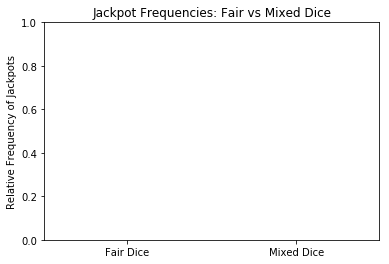

In [37]:
from montecarlo import Analyzer
import matplotlib.pyplot as plt

analyze_fair_dice = Analyzer(fair_dice_game)
analyze_mixed_dice = Analyzer(mixed_dice_game)

jackpot_count_fair = analyze_fair_dice.jackpot()
jackpot_count_mixed = analyze_mixed_dice.jackpot()

total_rolls_fair = fair_dice_game.show('wide').shape[0]
total_rolls_mixed = mixed_dice_game.show('wide').shape[0]

relative_freq_fair = jackpot_count_fair / total_rolls_fair
relative_freq_mixed = jackpot_count_mixed / total_rolls_mixed

print(f"Relative frequency of jackpots (Fair dice): {relative_freq_fair:.4f}")
print(f"Relative frequency of jackpots (Mixed dice): {relative_freq_mixed:.4f}")

labels = ['Fair Dice', 'Mixed Dice']
frequencies = [relative_freq_fair, relative_freq_mixed]

plt.bar(labels, frequencies, color=['blue', 'green'])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Jackpot Frequencies: Fair vs Mixed Dice')
plt.ylim(0, 1)
plt.show()


## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [39]:
letter_weights = {}
with open('english_letters.txt', 'r') as f:
    for line in f:
        parts = line.strip().split()
        if len(parts) == 2:
            letter, freq = parts
            letter_weights[letter.upper()] = float(freq)

from montecarlo import Die

alphabet_die = Die(list(letter_weights.keys()))

for letter, weight in letter_weights.items():
    alphabet_die.change_weight(letter, weight)

print("Alphabet Die with Frequencies Applied:")
print(alphabet_die.show())

Alphabet Die with Frequencies Applied:
   face       weight
0     E  529117365.0
1     T  390965105.0
2     A  374061888.0
3     O  326627740.0
4     I  320410057.0
5     N  313720540.0
6     S  294300210.0
7     R  277000841.0
8     H  216768975.0
9     L  183996130.0
10    D  169330528.0
11    C  138416451.0
12    U  117295780.0
13    M  110504544.0
14    F   95422055.0
15    G   91258980.0
16    P   90376747.0
17    W   79843664.0
18    Y   75294515.0
19    B   70195826.0
20    V   46337161.0
21    K   35373464.0
22    J    9613410.0
23    X    8369915.0
24    Z    4975847.0
25    Q    4550166.0


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [40]:
from montecarlo import Game

alphabet_game = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die])

alphabet_game.play(1000)

print("1000 rolls with 4 alphabet dice (Results):")
print(alphabet_game.show('wide').head())

1000 rolls with 4 alphabet dice (Results):
            die_0 die_1 die_2 die_3
roll_number                        
0               H     R     S     U
1               D     S     E     R
2               R     E     G     N
3               O     P     D     U
4               E     M     B     R


Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [41]:
import itertools

with open('scrabble_words.txt', 'r') as f:
    scrabble_words = set(word.strip().upper() for word in f)

results = alphabet_game.show('wide')

valid_word_count = 0

for idx, row in results.iterrows():
    letters = row.values
    perms = set(''.join(p) for p in itertools.permutations(letters))
    if perms & scrabble_words:
        valid_word_count += 1

print(f"Number of valid English words formed from dice rolls: {valid_word_count}")

Number of valid English words formed from dice rolls: 527


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [42]:
alphabet_game_5 = Game([alphabet_die, alphabet_die, alphabet_die, alphabet_die, alphabet_die])

alphabet_game_5.play(1000)

results_5 = alphabet_game_5.show('wide')

valid_word_count_5 = 0

for idx, row in results_5.iterrows():
    letters = row.values
    perms = set(''.join(p) for p in itertools.permutations(letters))
    if perms & scrabble_words:
        valid_word_count_5 += 1

print(f"Number of valid English words formed: {valid_word_count_5}")

print("\nComparison:")
print(f"Words with 4 dice: {valid_word_count}")
print(f"Words with 5 dice: {valid_word_count_5}")

if valid_word_count > valid_word_count_5:
    print("Using 4 dice produced more words.")
elif valid_word_count_5 > valid_word_count:
    print("Using 5 dice produced more words.")
else:
    print("Both produced the same number of words.")


Number of valid English words formed: 302

Comparison:
Words with 4 dice: 527
Words with 5 dice: 302
Using 4 dice produced more words.
